In [19]:
import pandas as pd
import numpy as np


In [20]:
data = pd.read_csv("../../Datasets/UpdatedStudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [21]:
scores = ['math score' , 'reading score' , 'writing score']
for score in scores:
    data[score].fillna(data[score].mean() , inplace = True)

In [22]:
data['gender'].replace('f' , 'female' , inplace = True)
data["gender"].unique()

array(['female', 'male'], dtype=object)

<Axes: >

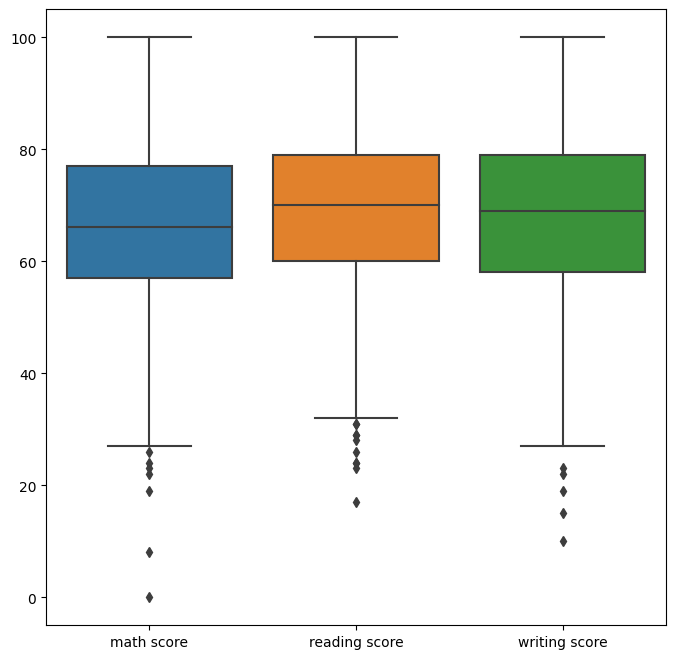

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.boxplot(data=data)

In [24]:
Q1=data["math score"].quantile(0.25)
Q3=data["math score"].quantile(0.75)
IQR=Q3-Q1
low=Q1-1.5*IQR
high=Q3+1.5*IQR
outliers=data[(data["math score"]<low)|(data["math score"]>high)]
filtered=data[~data.index.isin(outliers.index)]
filtered

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


<Axes: >

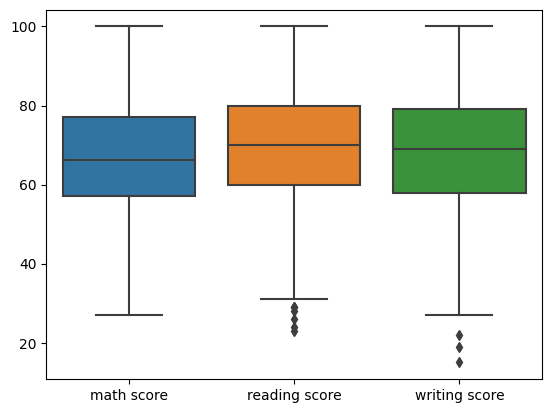

In [25]:
sns.boxplot(filtered)

<Axes: >

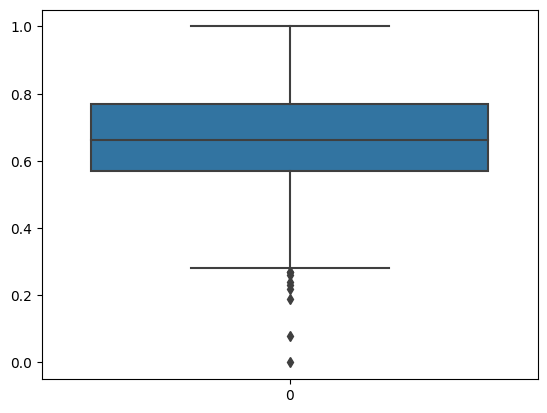

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
data["math score"]=scaler.fit_transform(data["math score"].values.reshape(-1,1))
sns.boxplot(data["math score"])

<Axes: >

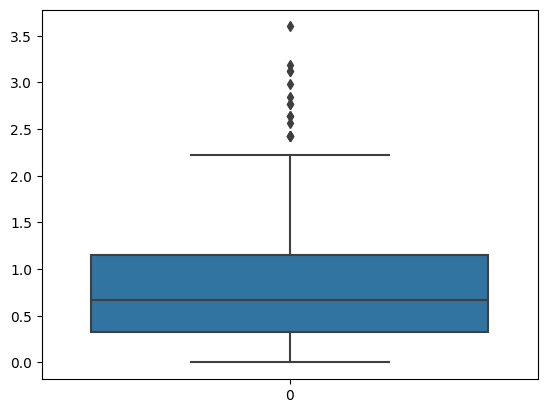

In [28]:
from scipy import stats
data["reading score"]=np.abs(stats.zscore(data["reading score"]))
sns.boxplot(data["reading score"])